In [44]:
import pandas as pd
import matplotlib.pyplot as plt
#读取工作簿和工作簿中的工作表
data_frame=pd.read_excel('Problem_C_Data_Wordle.xlsx')

data = list(reversed(data_frame.loc[ 1: ,"Unnamed: 4"].tolist()))

start=0
datas=data[start:]
# for t in range(len(datas)-1):
#     datas[t]=datas[t+1]-datas[t]
# datas[-1]=data[-1]-data[-2]
length=len(datas)
days=[[i] for i in range(length)]

In [45]:
#!/usr/bin/env python
# coding: utf-8
 
# In[1]:
 
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

 
from torch import nn
from torch.autograd import Variable
 
 
# In[121]:
 
 
batch_size=32
time_step=25
epoch=500
input_size=2
output_size=1
mid_dim=8
mid_layers=1
 
 
# In[122]:
 
class RegLSTM(nn.Module):
    def __init__(self, inp_dim, out_dim, mid_dim, mid_layers,batch):
        super(RegLSTM, self).__init__()
 
        self.rnn = nn.LSTM(inp_dim, mid_dim, mid_layers,batch_first=batch)  # rnn
        self.reg = nn.Sequential(
            nn.Linear(mid_dim, mid_dim),
            nn.Tanh(),
            nn.Linear(mid_dim, out_dim),
        )  # regression
 
    def forward(self, x):
        y = self.rnn(x)[0]  # y, (h, c) = self.rnn(x)
 
        batch_size, seq_len, hid_dim = y.shape
        y = y.reshape(-1, hid_dim)
        y = self.reg(y)
        y = y.reshape(batch_size, seq_len, -1)
        return y
 
 
# In[123]:
 
 
def load_data():
    seq_number=np.array(datas,dtype=np.float32
    )
    #print(seq_number)
    seq_number=seq_number[:,np.newaxis]
    
    #print(seq_number.shape)
    seq_year_month=np.array(days,dtype=np.float32)
    #print(seq_year_month.shape)
    seq=np.concatenate((seq_number,seq_year_month),axis=1)
    print(seq.mean(axis=0),seq.std(axis=0))
    seq=(seq-seq.mean(axis=0))/seq.std(axis=0)
    return(seq)
 
 
# In[124]:
 
 
data=load_data()
#print(data)
train_size=int(len(data)-1)
 
 
# In[125]:
 
 
data_sample=np.zeros((train_size-time_step+1,time_step,input_size))
label_sample=np.zeros((train_size-time_step+1,time_step,output_size))
for i in range(train_size-time_step+1):
    data_sample[i]=data[i:i+time_step,:]
    label_sample[i]=data[i+1:i+1+time_step,0:1:]
 
 
# In[126]:
 
 
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
net=RegLSTM(input_size,output_size,mid_dim,mid_layers,True).to(device)
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(net.parameters(),lr=1e-2)
 
 
# In[127]:
 
 
for i in range(epoch):
    for j in range(int((train_size-time_step+1)/batch_size)):
        train_X=data_sample[j*batch_size:(j+1)*batch_size,:,:]
        train_Y=label_sample[j*batch_size:(j+1)*batch_size,:,:]
        var_x=torch.tensor(train_X,dtype=torch.float32,device=device)
        var_y=torch.tensor(train_Y,dtype=torch.float32,device=device)
        out = net(var_x)
        loss=criterion(out,var_y)
        #loss = criterion(out[:,-1,:], var_y[:,-1,:])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_X=data_sample[(j+1)*batch_size:,:,:]
    train_Y=label_sample[(j+1)*batch_size:,:,:]
    var_x=torch.tensor(train_X,dtype=torch.float32,device=device)
    var_y=torch.tensor(train_Y,dtype=torch.float32,device=device)
    out = net(var_x)
    loss = criterion(out, var_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100==0:
        print('Epoch: {:4}, Loss: {:.5f}'.format(i, loss.item()))
 
 
# In[128]:
 
 


[90982.93   179.  ] [89094.67      103.63397]
Epoch:    0, Loss: 0.52468
Epoch:  100, Loss: 0.00167
Epoch:  200, Loss: 0.00071
Epoch:  300, Loss: 0.00074
Epoch:  400, Loss: 0.00070


(359, 2)
[19109.82]
[19040.234]
[18765.234]
[18639.656]
[18462.82]
[18306.93]
[18142.273]
[17981.984]
[17820.781]
[17660.516]
[17500.617]
[17341.352]
[17182.453]
[17024.172]
[16866.29]
[16709.016]
[16552.102]
[16395.828]
[16240.031]
[16084.477]
[15929.766]
[15775.289]
[15621.289]
[15467.883]
[15314.9375]
[15162.367]
[15010.227]
[14858.672]
[14707.594]
[14556.852]
[14406.695]
[14256.852]
[14107.586]
[13958.633]
[13810.25]
[13662.18]
[13514.68]
[13367.609]
[13220.867]
[13074.6875]
[12928.8125]
[12783.484]
[12638.453]
[12493.945]
[12349.898]
[12206.133]
[12062.758]
[11920.094]
[11777.422]
[11635.578]
[11493.852]
[11352.68]
[11211.797]
[11071.414]
[10931.32]
[10791.719]
[10652.539]
[10513.625]
[10375.219]
[10237.078]
[[-0.8067049 ]
 [-0.8056381 ]
 [-0.8068888 ]
 [-0.80646145]
 [-0.806618  ]
 [-0.8065442 ]
 [-0.8065753 ]
 [-0.8065629 ]
 [-0.8065666 ]
 [-0.80656564]
 [-0.80656624]
 [-0.8065655 ]
 [-0.80656624]
 [-0.80656564]
 [-0.80656624]
 [-0.8065655 ]
 [-0.80656636]
 [-0.8065655 ]
 [-0.80

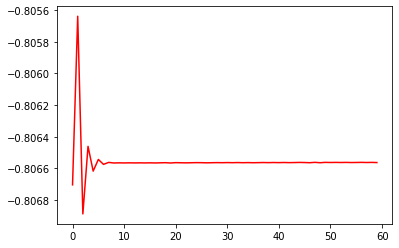

In [46]:
net=net.eval()

test_y=list()
new_mean=np.array([90982.93 , 179.  ])
new_std=np.array([89094.67 , 103.63397])
print(data.shape) 
for i in range(60):
    test_X=data[-time_step:,:]
    test_x=test_X[:time_step,:].reshape(1,time_step,input_size)
    test_x=torch.tensor(test_x,dtype=torch.float32,device=device)
    tem=net(test_x).cpu().data.numpy()
    test_y.append(tem[0][-1])
    print(test_y[-1]*new_std[0]+new_mean[0])
    for item in data:
        item[0]=item[0]*new_std[0]+new_mean[0]
        item[1]=item[1]*new_std[1]+new_mean[1]
    
    real=test_y[-1]*new_std[0]+new_mean[0]
    new=np.array([[int(real),train_size+1+i]])
    data=np.concatenate((data,new),axis=0)
    
    new_mean=data.mean(axis=0)
    new_std=data.std(axis=0)
    data=(data-data.mean(axis=0))/data.std(axis=0)
    #print(data)
test_y=np.array(test_y).reshape((-1,1))

print(test_y)



plt.plot(test_y, 'r', label='pred')

 
 

 
 
 



In [47]:
print(new_std,new_mean)

[86711.67804126   120.954536  ] [80037.90896759   209.00000068]


In [48]:
print(test_y[-1]*new_std[0]+new_mean[0])

[10099.398]
